In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from K_mean_simple import Kmean_simple
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['type'] = iris.target
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   type               150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


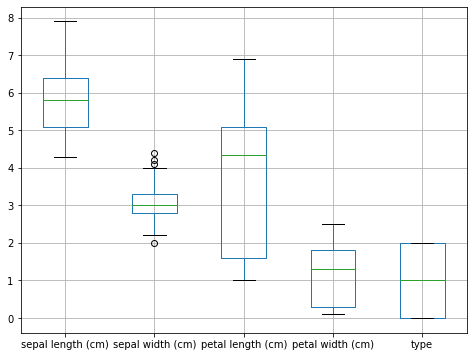

In [3]:
iris_data.boxplot( figsize=(8, 6))

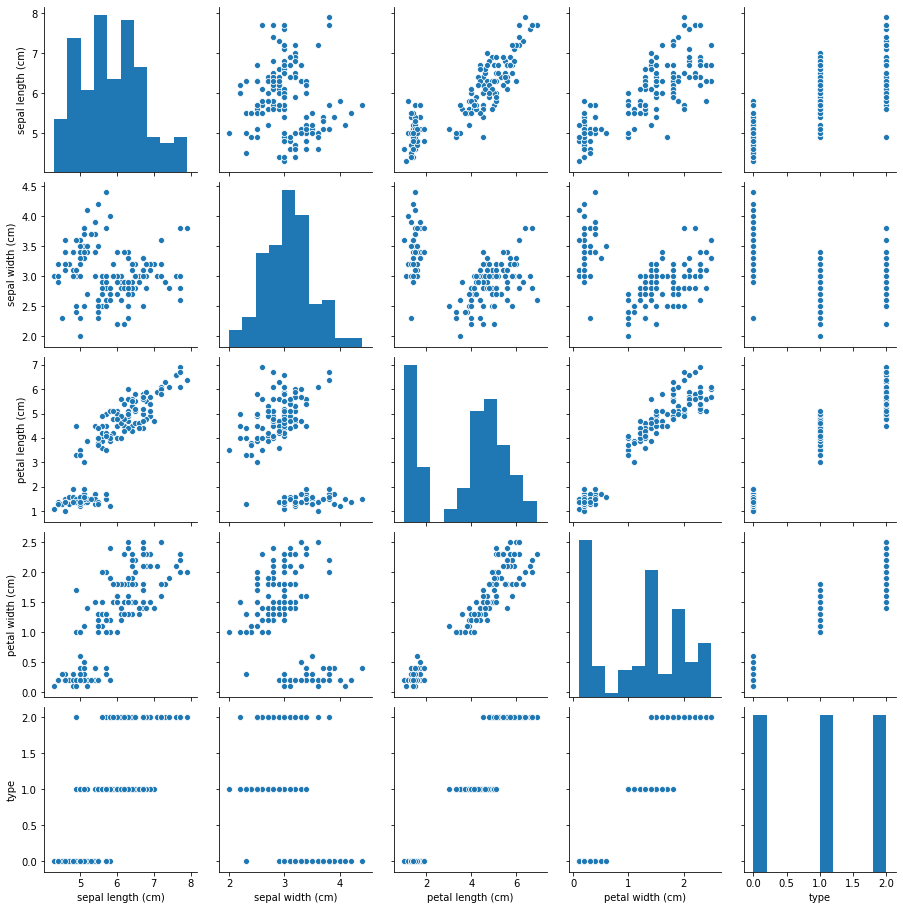

In [4]:

sns.pairplot(iris_data, vars=iris_data.columns.values)

In [5]:
X = iris['data'][:, (2, 3)] # 只取后两个特征，一个是为了方便画图
y = iris['target']# 二确实是使用最后俩个特征效果更好
KMean = Kmean_simple(k=3)
result = KMean.predict(X)
print(result) # 看一下聚类结果和原来情况
print(y) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


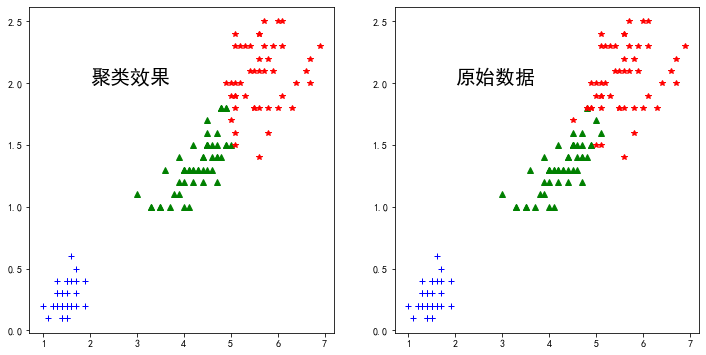

In [6]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.text(2, 2,"聚类效果", fontsize = 20)
x_1 = X[:, 0][result == 0.]
x_2 = X[:, 1][result == 0.]
plt.plot(x_1, x_2, 'b+')
x_1 = X[:, 0][result == 1.]
x_2 = X[:, 1][result == 1.]
plt.plot(x_1, x_2, 'g^')
x_1 = X[:, 0][result == 2.]
x_2 = X[:, 1][result == 2.]
plt.plot(x_1, x_2, 'r*')

plt.subplot(122)
plt.text(2, 2,"原始数据", fontsize = 20)
x_1 = X[:, 0][y == 0]
x_2 = X[:, 1][y == 0]
plt.plot(x_1, x_2, 'b+')
x_1 = X[:, 0][y == 1]
x_2 = X[:, 1][y == 1]
plt.plot(x_1, x_2, 'g^')
x_1 = X[:, 0][y == 2]
x_2 = X[:, 1][y == 2]
plt.plot(x_1, x_2, 'r*')

# 兰德指数

范围为[-1, 1]， 值越大意味与真实数据越吻合

衡量两个数据分布的吻合程度

In [7]:
from sklearn import metrics
metrics.adjusted_rand_score(y, result) 

0.8509627406851713

# 轮廓系数

* 对于单个样本，轮廓系数：

  ((与同簇中样本的平均距离) + (与最近的其他簇中样本的平均距离))/两者中的最大值
  
* 范围 [-1, 1], 分数越高越好，即与同类别之间的距离更近，与不同类别样本的距离更远。

* 对于一个集合来说

  轮廓系数计算的是所有样本轮廓系数的平均值

In [8]:
metrics.silhouette_score(X, result, metric='euclidean')

0.6602609960912108